In [ ]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from google.colab import files
import joblib

In [ ]:
df=pd.read_csv("Top Goals.csv")

In [ ]:
print(df.columns)

Index(['Season', 'Rank', 'Player', 'Club', 'Goals', 'IsTop10', 'Position',
       'Age', 'Appearances', 'Goals_prev_season', 'Assists', 'Penalty_Goals',
       'Non-Penalty_Goals', 'Goals_per_90', 'Big_6_Club_Feature',
       'Club_League_Rank', 'Club_Total_Goals', 'League_Goals_per_Match',
       'Games_in_Season'],
      dtype='object')


In [ ]:
df=df.drop(['Season', 'Rank', 'Player', 'Club','Assists','Penalty_Goals','Non-Penalty_Goals','IsTop10','Club_League_Rank', 'Club_Total_Goals','Games_in_Season'],axis=1)

In [ ]:
print(df.columns)

Index(['Goals', 'Position', 'Age', 'Appearances', 'Goals_prev_season',
       'Goals_per_90', 'Big_6_Club_Feature', 'League_Goals_per_Match'],
      dtype='object')


In [ ]:
print(df.head())
print(df.info())
print(df.describe())

   Goals              Position  Age  Appearances  Goals_prev_season  \
0     27               Forward   23           31               36.0   
1     22  Attacking Midfielder   22           33                3.0   
2     21               Forward   24           30               10.0   
3     19               Forward   28           37               15.0   
4     19               Forward   26           38                6.0   

   Goals_per_90  Big_6_Club_Feature  League_Goals_per_Match  
0          0.85                 1.0                    2.83  
1          0.61                 1.0                    2.83  
2          0.76                 0.0                    2.83  
3          0.51                 0.0                    2.83  
4          0.50                 0.0                    2.83  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 324 entries, 0 to 323
Data columns (total 8 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  -------------- 

In [ ]:
#Checking null and duplicate values
print(df.isnull().sum())
print(df.duplicated().sum())

Goals                       0
Position                    0
Age                         0
Appearances                 0
Goals_prev_season         115
Goals_per_90                0
Big_6_Club_Feature          0
League_Goals_per_Match      0
dtype: int64
0


In [ ]:
#Handling missing values with mean
df = df.fillna(df.mean(numeric_only=True))

In [ ]:
df = df.drop_duplicates()

In [ ]:
#Checking null and duplicate values
print(df.isnull().sum())
print(df.duplicated().sum())

Goals                     0
Position                  0
Age                       0
Appearances               0
Goals_prev_season         0
Goals_per_90              0
Big_6_Club_Feature        0
League_Goals_per_Match    0
dtype: int64
0


In [ ]:
#Label Encoding
df1=df.copy()
le = LabelEncoder()
df1["Position"] = le.fit_transform(df1["Position"])

df1.head(3)

,Goals,Position,Age,Appearances,Goals_prev_season,Goals_per_90,Big_6_Club_Feature,League_Goals_per_Match
0,27,1,23,31,36.0,0.85,1.0,2.83
1,22,0,22,33,3.0,0.61,1.0,2.83
2,21,1,24,30,10.0,0.76,0.0,2.83


In [ ]:
#One hot encoding (we apply this encoding method becouase the position feature is not in certain order So we go with one hot encoding rather than label encoding)
df = pd.get_dummies(df, columns=['Position'], prefix='Pos', dtype=int)
df.head(3)

,Goals,Age,Appearances,Goals_prev_season,Goals_per_90,Big_6_Club_Feature,League_Goals_per_Match,Pos_Attacking Midfielder,Pos_Forward,Pos_Midfielder,Pos_Winger
0,27,23,31,36.0,0.85,1.0,2.83,0,1,0,0
1,22,22,33,3.0,0.61,1.0,2.83,1,0,0,0
2,21,24,30,10.0,0.76,0.0,2.83,0,1,0,0


In [ ]:
df

,Goals,Age,Appearances,Goals_prev_season,Goals_per_90,Big_6_Club_Feature,League_Goals_per_Match,Pos_Attacking Midfielder,Pos_Forward,Pos_Midfielder,Pos_Winger
0,27,23,31,36.00000,0.85,1.0,2.83,0,1,0,0
1,22,22,33,3.00000,0.61,1.0,2.83,1,0,0,0
2,21,24,30,10.00000,0.76,0.0,2.83,0,1,0,0
3,19,28,37,15.00000,0.51,0.0,2.83,0,1,0,0
4,19,26,38,6.00000,0.50,0.0,2.83,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...
319,15,25,41,15.38756,0.37,0.0,2.58,0,1,0,0
320,15,29,36,15.38756,0.42,1.0,2.58,0,1,0,0
321,15,24,40,15.38756,0.38,0.0,2.58,1,0,0,0
322,15,23,42,15.38756,0.36,0.0,2.58,0,1,0,0


In [ ]:
#Checking correlation
corr = df.corr(numeric_only=True)
print(corr)

                             Goals       Age  Appearances  Goals_prev_season  \
Goals                     1.000000 -0.081050     0.304093           0.310966   
Age                      -0.081050  1.000000    -0.133986          -0.096122   
Appearances               0.304093 -0.133986     1.000000           0.018944   
Goals_prev_season         0.310966 -0.096122     0.018944           1.000000   
Goals_per_90              0.119255 -0.024366     0.064627           0.082902   
Big_6_Club_Feature        0.137135 -0.037688    -0.137893           0.068820   
League_Goals_per_Match    0.001087 -0.018529     0.102675           0.029578   
Pos_Attacking Midfielder  0.028604 -0.052775     0.076254           0.002051   
Pos_Forward               0.053045 -0.074191    -0.058809           0.223605   
Pos_Midfielder           -0.118992  0.145582    -0.023882          -0.275675   
Pos_Winger                0.016088 -0.000174     0.062543          -0.064910   

                          Goals_per_90 

In [ ]:
target_corr = corr["Goals"].sort_values(ascending=False)
print("Correlation with Goals:\n", target_corr)

Correlation with Goals:
 Goals                       1.000000
Goals_prev_season           0.310966
Appearances                 0.304093
Big_6_Club_Feature          0.137135
Goals_per_90                0.119255
Pos_Forward                 0.053045
Pos_Attacking Midfielder    0.028604
Pos_Winger                  0.016088
League_Goals_per_Match      0.001087
Age                        -0.081050
Pos_Midfielder             -0.118992
Name: Goals, dtype: float64


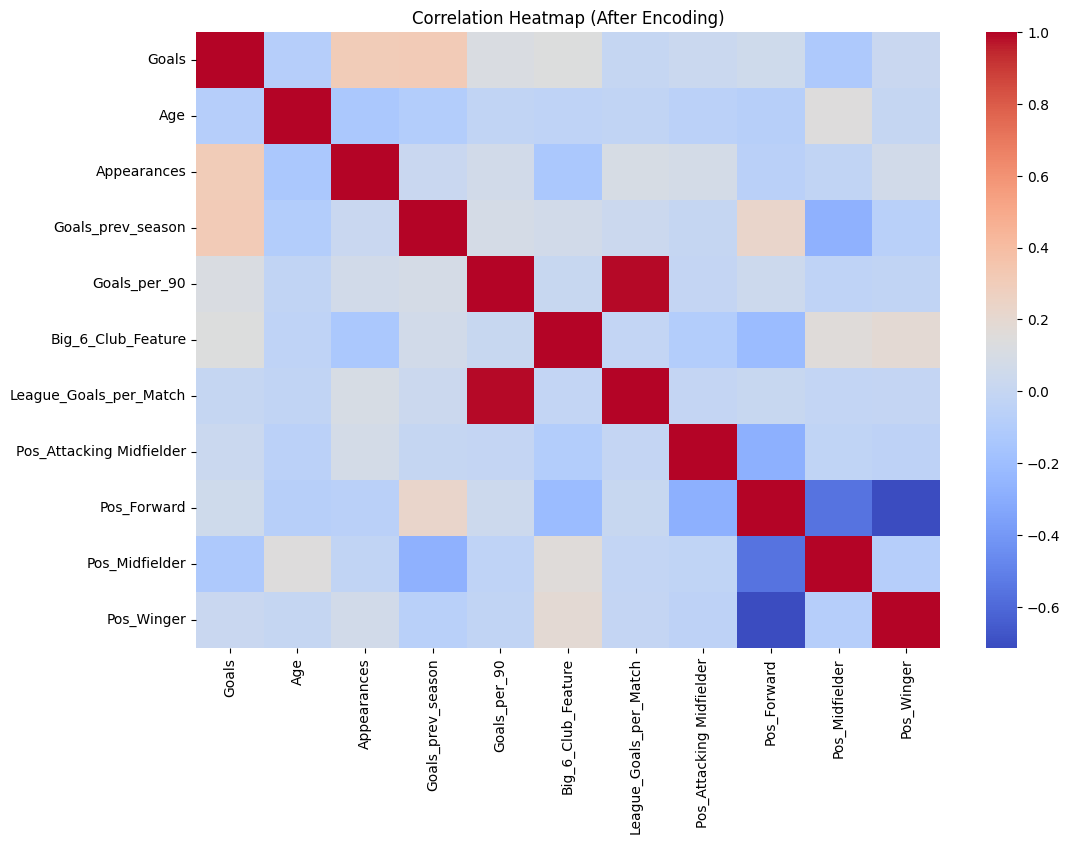

In [ ]:
plt.figure(figsize=(12, 8))
sns.heatmap(corr, cmap="coolwarm", annot=False)
plt.title("Correlation Heatmap (After Encoding)")
plt.show()

In [ ]:
df.columns

Index(['Goals', 'Age', 'Appearances', 'Goals_prev_season', 'Goals_per_90',
       'Big_6_Club_Feature', 'League_Goals_per_Match',
       'Pos_Attacking Midfielder', 'Pos_Forward', 'Pos_Midfielder',
       'Pos_Winger'],
      dtype='object')

In [ ]:
y=df['Goals']
x=df.drop(['Goals'],axis=1)

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(
    x, y, test_size=0.2, random_state=42
)

In [ ]:
model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
y_pred = model.predict(x_test)
mse = mean_squared_error(y_test, y_pred)   # Mean Squared Error
mae = mean_absolute_error(y_test, y_pred)  # Mean Absolute Error
r2 = r2_score(y_test, y_pred)             # R² Score

print("MSE:", mse)
print("MAE:", mae)
print("R2 Score:", r2)

MSE: 1.8547864087486055
MAE: 1.05629544272721
R2 Score: 0.9055049731464746


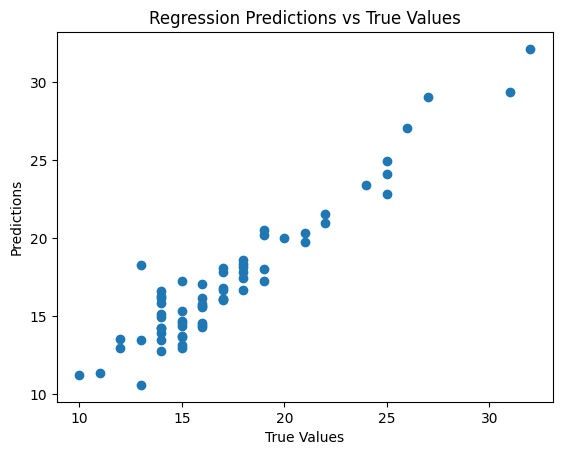

In [ ]:
plt.scatter(y_test, y_pred)
plt.xlabel("True Values")
plt.ylabel("Predictions")
plt.title("Regression Predictions vs True Values")
plt.show()

In [ ]:
joblib.dump(model, "linear_regression_model.pkl")
files.download("linear_regression_model.pkl")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>